#Machine Learning Engineer Nanodegree
##Model Evaluation & Validation
##Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

#Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


#Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

##Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [2]:
# Number of houses in the dataset
total_houses = np.size(housing_features,0)

# Number of features in the dataset
total_features = np.size(housing_features,1)

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


##Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **
#### Three data points of significance ####
* (1) CRIM: per capita crime rate by town 
* (6) RM: average number of rooms per dwelling
* (10) TAX: full-value property-tax rate per $10,000
--------------------------------------------------------
##### What do They Mean?
* CRIM
** This data point measures crime rate per capita per town. A simple but powerful statistic for someone who wants to move or buy property in a town. The lower the crime rate, the higher would be the house prices and more chances of property value to grow. 
* RM
** Number of rooms per housing lot could give an insight on how many rooms can a person expect from an average house in a town. More number of rooms would indicate larger family or bigger space in general. Lesser number of rooms would indicate smaller family or smaller size lots in general. An important factor contributing to the price of the house.
* TAX
** Tax Rate for the house. Someone buying a house will cover their expenses by including how much tax would they pay on their property. Obviously, tax being a regular scheduled expense, weighs a lot on the price of the house. In general, sellers would reduce the price of a house, given a normal real estate environment, to accomodate for higher tax rates. This can obviously change with other factors like neighborhood, housing demand and supply etc...


##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [3]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **

* CRIM **** Number one in index would point to index zero (0) of the CLIENT_FEATURES list: __11.95__
* RM   **** Number six in index would point to index five (5) of the CLIENT_FEATURES list: __5.609__
* TAX  **** Number ten in index would point to index nine (9) of the CLIENT_FEATURES list: __680.0__


#Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

##Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [45]:
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=50)
    # Shuffle and split the data
    X_train = xtrain
    y_train = ytrain
    X_test = xtest
    y_test = ytest

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except Exception as e:
    print "Something went wrong with shuffling and splitting the data.", e

Successfully shuffled and split the data!


##Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: **

* __Quick__ answer is to find the optimal balance between bias and variance for your model given your dataset. First some terminology.
* __Features__ provide explanatory power to a model. A model structures a given data by making use of these features in the anticipation that a similar data when presented to model, could be easily recognized and hence predicted upon. Features are extracted from data and are input to the model. Model then pushes output(s) based on these features and some algorithm which is model specific. *_Please look at the figures below for references on this explanation_*. Figure **Data** shows a scatter plot with data manufactured to help explain this scenario. We call this data as **__Training Data__**
* __High Bias__ Figure **High Bias** shows a scatter plot with the same data and a line plot that attempts to model this data i.e. *_Explain_* OR *_Fit_* this data. As we can see it does a *_poor_* job of fitting. No matter what x value _(Feature)_ is, y value _(Predicted)_ remains the same.
* __ Over Fit__ Figure ** Perfect Fit / Over Fit ** shows the same data and the line plot (in red). As we can see, the predicted values or the y values match one to one to features or x values.
* __High Variance__ Figure ** High Variance ** shows a different data which is slightly modified from the original data and red line that follows the previous figure. As we can see the model does *NOT* fit the new data very well. This *_variance_* in the performance of old and new data is caused by using *too many* *_features_* when training the data.
* __ So What Did We Learn ? __ we split the data into *_training_* and *_test_* sets by *randomnly* choosing a larger set for training and a smaller set for testing. The word *random* is important as the feature set we get could be highly static, as in one set of features could be in a specific range, and we could get that range for training and the other set for testing. Basically, we need to ensure that we are uniformly chosing our training and test set from the data set. *_Larger_* set for training is crucial as more data helps the model to *_train_* better. 
--------------------------------------------------------------------------------------
*_Now that we have split the data into training and test set, we can iterate through the number of features to use in the model so that our model performs equally well in both training and test set, thereby, reducing underfitting (high bias) and overfitting (high variance), eventually coming with an optimal set of features._*

--------------------------------------------------------------------------------------

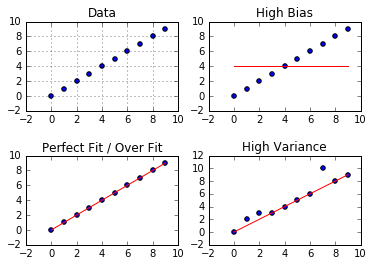

In [5]:
features_x = range(0,10,1)
features_y = range(0,10,1)
fig = pl.figure(1)
fig.subplots_adjust(hspace=0.5)
pl.subplot(2, 2, 1)
pl.title("Data")
pl.scatter(features_x, features_y)
pl.grid(True)
pl.subplot(2,2,2)
pl.scatter(features_x, features_y)
pl.plot(features_x, [4, 4, 4, 4, 4, 4, 4, 4, 4, 4], color='red')
pl.title("High Bias")
pl.subplot(2,2,3)
pl.scatter(features_x, features_y)
pl.plot(features_x, features_y, color='red')
pl.title("Perfect Fit / Over Fit")
pl.subplot(2,2,4)
pl.title("High Variance")
pl.plot(features_x, features_y, color='red')
features_yvar = [0, 2, 3, 3, 4, 5, 6, 10, 8, 9]
pl.scatter(features_x, features_yvar)
pl.show()

##Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [46]:
# Put any import statements you need for this code block here
import sklearn.metrics as mt

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mt.mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except Exception as e:
    print "Something went wrong with performing a metric calculation.", e

Successfully performed a metric calculation!


##Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
*Lets take them one by one*
* _Accuracy_ : this is a multi label classification metric where labels must exactly match from training to test. It is a good measure to test a model's performance but we are trying to predict a *value* of a given house and not the exact classification type. *_Not a good metric_*
* _Precision_ : this is a classification metric which tries to asses model's capability to NOT identify a sample as positive when the sample is actually negative. It does not tell us anything about the *predicted* value. *_Not a good metric_*
* _Recall_ : this is also a classification metric which tries to assess model's capability to identify *all* positive samples. Again, not something we are trying to achieve here. *_Not a good metric_*
* _F1 Score_ : a derrived score from *_Precision_* and *_Recall_*. *_(Precision * Recall)/(Precision + Recall)_*. *_Not a good metric_*
* _Mean Squared Error(MSE)_ : is a metric typically used in linear regression that fits a model with minimum variance of fitted line across actual samples. This is more close to our target of *_predicting_* a house vlaue give some features. Mean square error works by the following loss formula: $$\sum_{i=1}^n (y-y_i)^2$$.Here _y_ is the actual value from training and $y_i$ is the predicted value from the model test run. The metric tells us the fitted line that _minimizes_ this loss and hence gives us a predicted value that closely matches our target. This model also fits well in a continuous domain. Since house prices are a continuous data set, we can very well consider this as our choice. Another reason we chose this metric is because of the fact that this metric returns a variance form of error which then needs to be square rooted to get the actual error in the same units as our dataset. This also reduces the impact of an outlier in our data set. *_Good choice for a metric_*
* _Mean Absolute Error(MAE)_ : this metric calculates absolute error from the fitted line. If not taken absolute, the mean of all errors sum up to zero. That is because some points would be more than the mean and some will be less. If taken absolute, the error will be a large number. We would rather chose a variance type of metric to reduce the impact of an outlier. Although a valid choice, this option will be highly impacted by outliers. * So ok choice but choose not to adopt this metric*. 

----------------------------------------------------------------------------------------
*_So we chose MSE as our metric_*

----------------------------------------------------------------------------------------

##Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [47]:
# Put any import statements you need for this code block
import sklearn.metrics as mt
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = mt.make_scorer(mt.mean_squared_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(estimator=regressor, param_grid=parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


##Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **
So we have a model based on features / parameters / input like _Crime Rate_ which are fitted or optimally estimated in the model runs. We may have other parametes like _learning rate_ on _Gradient Descent_ or _regularization coefficient_ in _logistic regression_ or _kernel_, _C_, _gamma_ in _SVM_; which are not learned / fitted / estimated from model runs. To learn these parameters, we use Grid Search algorithm. In this algorithm, we use a set of parameters to iterate through model runs. In each iteration, we map the score / model performance of the model run to its parameters. In the end we chose the set of parameters that give us the best score / least error. 

This way, we can generalize the parameter learning irrespective of the model estimator or the scoring function. This generalized 'framework' could be used by substituting between choices of estimators and scoring functions.

         Parameters----
         
INPUT--> Estimator---------------GridSearch--------result ---------------> INPUT

         Scorer--------
         
         
In this specific case in step 4, *Our inputs* are

   Estimator: _DecisionTreeRegressor_
   
   Parameter: _'max_depth':(1,2,3,4,5,6,7,8,9,10)_. Varies max_depth for DecisionTreeRegressor in each iteration
   
   Scorer   :  _mt.mean_squared_error, greater_is_better=False_. MSE with an indication that this is a loss function and not a score. So less the error, better the model fit.
   
   *Our outputs* (same in all cases) are _fit_ and _predict_. _fit_ traint the model and _predict_ evaluates a test data for new features. This prediction is then _scored_ and evaluated. 
  
-------------------------------------------------------------------------------------
   _pretty neat, yeah!_
   
-------------------------------------------------------------------------------------   
                                                                                    
 

##Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

* _What is cross-validation?_: We talked about overfitting in "Question 4 Why do we split the data into training and testing subsets for our model?". Just a brief review here. When a model is trained and tested on the same dataset, it performs *perfect* on the same data set but performs *poorly* on any new data set. This is called _overfitting_. To avoid this situation, data set is divided into *training* and *testing* data sets. In this situation, we train on training set and test it on test set. This helps to train model but leaves out _hyper parameters_ as discussed in "What is the grid search algorithm and when is it applicable?". To ensure we avoid overfitting by not covering all hyper parameters we use a methodology called *_"cross validation"_*. In this methodology, we divide the data set into _three_ folds, a _training_ set, _validation_ set and a _test_ set. The hyper parameters are learned in validation set and repeated until all permutations and combinations are tested. Then an average of these parameters is taken and finally tested on test set.
* _How is it performed on a model?_: We talked about cross validation and a simple method (three fold) process. In general, cross validation is carried out in _k-fold_ steps. In this methodology, validation set is _NOT_ required. Instead, data is divided into training and test set. Furthermore, training set is divided into _k_ smaller sets. Model is then trained on _k-1_ sets and tested on last _kth_ set. This step is repeated until *all* combinations or parameters are tested. Then a final test is done on the average of parameters on the _test_ set.
* _Why would cross-validation be helpful when using grid search?_ : With the framework, given by grid search, of iterating through all combinations of parameters and drawing a score for each run, we can use cross validation into that mix and easily abstract the details of estimator and scorer and thus decouple our model complexity work with actual model work. When a data set is skewed or not randomnly selected for division, training and testing with one set or two sets may increase chance of overfitting. k-fold mechanism ensures this chance is reduced as data would be trained on multiple data sets before it is finally tested on the test set. Since the same data set is divided into smaller training sets, data usage is maximized. It ensures our model sees all forms of data before we finally pass it on to the test set.
----------------------------------------------------------------------------------------
*Cross-Validation helps simplify grid search with reducing the chance of overfitting and maximizing data usage by using methods like k-fold* 

-------------------------------------------------------------------------------------------

#Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [48]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [49]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

#Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/opt/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/opt/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


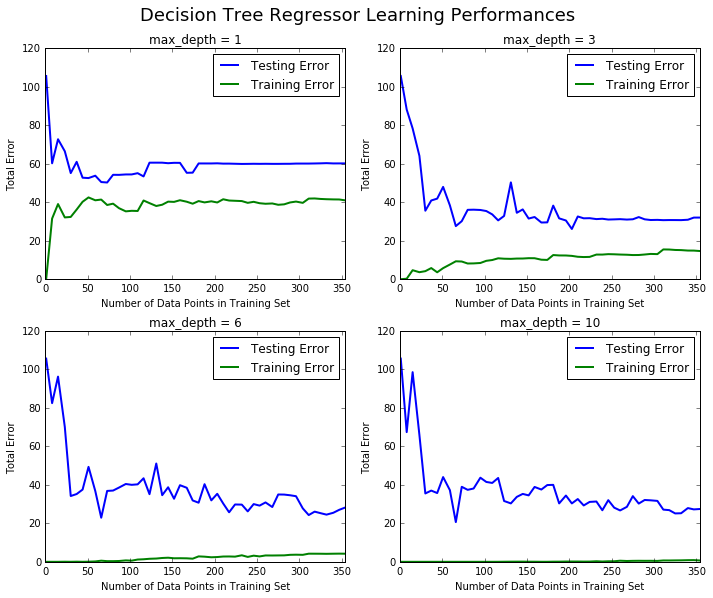

In [50]:
learning_curves(X_train, y_train, X_test, y_test)

##Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **
* max_depth = 6
   * X Axis: size of training set
   * Y Axis: Total Error
   * Blue: Testing Error
   * Green: Training Error
   * _What Happens to Training Error_: Green line slowly rises from _zero_ to _five_ approximately. So as training set increases, training error slowly increases.
   * _What Happens to Testing Error_: Blue line is a little more interesting. From Zero to 25, training error reduces from a very high 100 to somewhere in middle 60 (still high). Then it goes back up again to 100 from 25 to 50. So High variance on testing data. This error finally stabilizes around 200 training set size. And stays in that range until 350 which is the end of scale for training size.

##Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **
* At full training size on max_depth 1 and 10, we see that
   * depth 1: Training and Testing error converges to approximately 40 and 60 respectively. These error rates are high and thus we could say, model is poorly fitting data and showing *_high bias_*. 
   * depth 10: Training and Testing error converges to approximately 0 and 30 respectively. In this case, the total error is on the lower end on testing data but is still far apart from training data (zeroish). We can say model is still showing *_variance_* but not Bias. 

Creating a model complexity graph. . . 


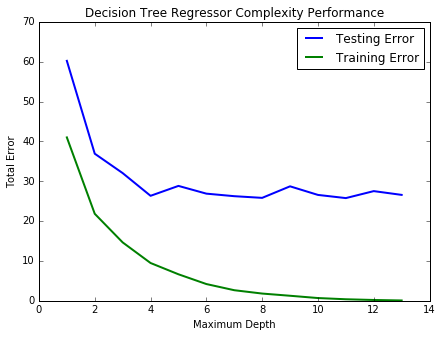

In [51]:
model_complexity(X_train, y_train, X_test, y_test)

##Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
* we see that from 1 to 3 both training and testing error substantially reduces but is still significant.
* At around 6, training error is significantly lower (approx 5) and testing error converges to 30.
* depth > 6, there is no significant drop in either training and testing set. 
* _so we chose 6_ based on law of diminishing margin returns. we get a lower error on 6 and not much improvement after words. 

#Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

##Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [52]:
print "Final model optimal parameters:", reg.best_params_

Final model optimal parameters: {'max_depth': 6}


**Answer: **
* _Max Depth_ of 6 matches with initial intuition.

##Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [53]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.766


**Answer: **
* _Model_ : 20.7
* _Stats_: *Mean* : 22.5, *Media* : 21.7
* We see that model predicted a lower value from the current mean and median. 
* Another way to learn about model's behavior is to check these results against some neighborhood sales that happened in the last few months.

##Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **
* Model is predicting a lower selling price of house than current statistical mean / median. If current economic situation foresee a down trend on house prices, I would use this model. This price is priced to sell and would immediately gather attention to buyers.